In [17]:
import xml.etree.ElementTree as ET 
import numpy as np
import matplotlib.pyplot as plt

import errors
import extract_observables
from plotting_envir import Plotter

In [18]:
b = 0.087 #fm
inv_fm_to_GeV = 0.197
unit_convert = 1/b * inv_fm_to_GeV

# wflow to 1.5

In [21]:
data_path = "/home/lqcd/brian137/chroma_Wloops/gpu/data/wflow_cl21_48_96_b6p3_m0p2416_m0p2050-1000/wflow_to_1.5_no_t/data"
smoothing = [0, 0.5, 1, 1.5]
data = extract_observables.Data_Processing(data_path, start_time = [7,10,12,13])

data.file1 = 3550
data.off_axis = True
data.set_time_diff = False
data.read_all_files()

Initializing Wloop reading
Reading data
(46, 4, 70)


Computing potential and errors


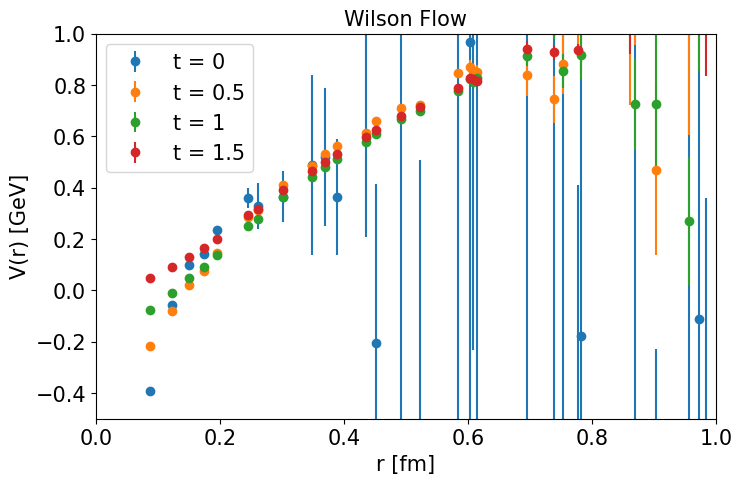

In [23]:
output = data.find_potential_errors()
plotter = Plotter(f"Wilson Flow", "r [fm]", "V(r) [GeV]", xlen = 8); ax = plotter.ax

subtractor = [1.6, 0.4, 0.15, 0]
for i in range(0,4):
    ax.errorbar((data.r)*b, output[i][0]*unit_convert - subtractor[i], 
                yerr = output[i][1]*unit_convert, fmt = "o", label = f"t = {smoothing[i]}")

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 1)
plotter.show_legend()


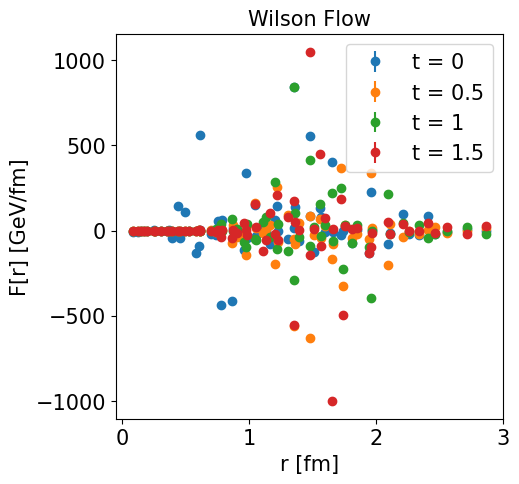

In [24]:
output = data.find_force_errors()
plotter = Plotter(f"Wilson Flow", "r [fm]", "F[r] [GeV/fm]"); ax = plotter.ax

for i in range(0,4):
    dr = data.r[1:] - data.r[:-1]
    ax.errorbar(data.r[:-1]*b, output[i][0]*unit_convert/(dr*b), yerr = output[i][1], fmt = "o", label = f"t = {smoothing[i]}")

plotter.show_legend()